In [1]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/IMDB Dataset.csv')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
df.shape

(50000, 2)

In [5]:
df['review'][0] 

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [6]:
df.duplicated().sum()

418

In [7]:
df = df.drop_duplicates()
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [8]:
df = df.iloc[:10000]

# Data Cleaning

In [9]:
# change to lowercase
df['review'] = df['review'].str.lower()

In [10]:
# remove white spaces
df['review'] = df['review'].str.strip()

In [11]:
df.head()

review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production. <br /><br />the...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there's a family where a little boy ...  negative
4  petter mattei's "love in the time of money" is...  positive

In [12]:
# import re
# # remove htmltags -> e.g. using re
# def remove_html(data):
#     data = re.sub(r'<.*?>','',data)
#     return data

In [13]:
# df['review'].apply(remove_html)

In [14]:
# remove htmltags
df['review'] = df['review'].str.replace(r'<.*?>','')

In [15]:
df.head()

review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production. the filming tec...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there's a family where a little boy ...  negative
4  petter mattei's "love in the time of money" is...  positive

In [16]:
# removing urls
# def remove_url(data):
#     data=re.sub(r"https?://\S+|www\.\S+",'',data)
#     return data

# remove_url('Hello www.campusx.in')

In [17]:
# check if review contains url
df['review'].str.contains(r"https?://\S+|www\.\S+").sum()

26

In [18]:
df['review'] = df['review'].str.replace(r"https?://\S+|www\.\S+", '')

In [19]:
# expanding abbreviations e.g. dont -> do not

In [20]:
import re
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data

In [21]:
#e.g.
remove_abb("I don't know and i can't tell you")

'I do not know and i cannot tell you'

In [22]:
df['review'] = df['review'].apply(remove_abb)

In [23]:
df.head()

review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production. the filming tec...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there is a family where a little boy...  negative
4  petter mattei's "love in the time of money" is...  positive

In [24]:
# Spelling Correction
from textblob import TextBlob

In [25]:
text = "hi i can drve at nigt"
TextBlob(text).correct().string

'hi i can drove at night'

In [26]:
def spelling_correction(text):
    return TextBlob(text).correct().string

In [27]:
# punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
def remove_punctuation(text):
    for i in string.punctuation:
        if i in text:
            text = text.replace(i,'')
            
    return text
            

In [29]:
df['review'] = df['review'].apply(remove_punctuation)

In [30]:
df.head()

review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production the filming tech...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there is a family where a little boy...  negative
4  petter matteis love in the time of money is a ...  positive

In [31]:
# remove special chars
# '[^\w\s]'

# Preprocessing

In [32]:
#Tokenization
import nltk
from nltk.tokenize import word_tokenize
# nltk.download('punkt')

In [33]:
df['tokenized_review'] = df['review'].apply(word_tokenize)

In [34]:
df.head()

review sentiment  \
0  one of the other reviewers has mentioned that ...  positive   
1  a wonderful little production the filming tech...  positive   
2  i thought this was a wonderful way to spend ti...  positive   
3  basically there is a family where a little boy...  negative   
4  petter matteis love in the time of money is a ...  positive   

                                    tokenized_review  
0  [one, of, the, other, reviewers, has, mentione...  
1  [a, wonderful, little, production, the, filmin...  
2  [i, thought, this, was, a, wonderful, way, to,...  
3  [basically, there, is, a, family, where, a, li...  
4  [petter, matteis, love, in, the, time, of, mon...

In [35]:
# Stopword Removal
from nltk.corpus import stopwords

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rudra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
def remove_stopwords(text):
    L = []
    for word in text:
        if word not in stopwords.words('english'):
            L.append(word)
            
    return L

In [39]:
df['tokenized_review'] = df['tokenized_review'].apply(remove_stopwords)

In [40]:
df.head()

review sentiment  \
0  one of the other reviewers has mentioned that ...  positive   
1  a wonderful little production the filming tech...  positive   
2  i thought this was a wonderful way to spend ti...  positive   
3  basically there is a family where a little boy...  negative   
4  petter matteis love in the time of money is a ...  positive   

                                    tokenized_review  
0  [one, reviewers, mentioned, watching, 1, oz, e...  
1  [wonderful, little, production, filming, techn...  
2  [thought, wonderful, way, spend, time, hot, su...  
3  [basically, family, little, boy, jake, thinks,...  
4  [petter, matteis, love, time, money, visually,...

In [41]:
df['review'] = df['tokenized_review'].apply(lambda x:' '.join(x))

In [42]:
df.head()

review sentiment  \
0  one reviewers mentioned watching 1 oz episode ...  positive   
1  wonderful little production filming technique ...  positive   
2  thought wonderful way spend time hot summer we...  positive   
3  basically family little boy jake thinks zombie...  negative   
4  petter matteis love time money visually stunni...  positive   

                                    tokenized_review  
0  [one, reviewers, mentioned, watching, 1, oz, e...  
1  [wonderful, little, production, filming, techn...  
2  [thought, wonderful, way, spend, time, hot, su...  
3  [basically, family, little, boy, jake, thinks,...  
4  [petter, matteis, love, time, money, visually,...

# EDA

In [43]:
# Char length of every review
df['char_length'] = df['review'].str.len()

In [44]:
df.head()

review sentiment  \
0  one reviewers mentioned watching 1 oz episode ...  positive   
1  wonderful little production filming technique ...  positive   
2  thought wonderful way spend time hot summer we...  positive   
3  basically family little boy jake thinks zombie...  negative   
4  petter matteis love time money visually stunni...  positive   

                                    tokenized_review  char_length  
0  [one, reviewers, mentioned, watching, 1, oz, e...         1142  
1  [wonderful, little, production, filming, techn...          656  
2  [thought, wonderful, way, spend, time, hot, su...          592  
3  [basically, family, little, boy, jake, thinks,...          440  
4  [petter, matteis, love, time, money, visually,...          863

In [45]:
# word_length
df['word_length'] = df['tokenized_review'].apply(len)

In [46]:
df.head()

review sentiment  \
0  one reviewers mentioned watching 1 oz episode ...  positive   
1  wonderful little production filming technique ...  positive   
2  thought wonderful way spend time hot summer we...  positive   
3  basically family little boy jake thinks zombie...  negative   
4  petter matteis love time money visually stunni...  positive   

                                    tokenized_review  char_length  word_length  
0  [one, reviewers, mentioned, watching, 1, oz, e...         1142          166  
1  [wonderful, little, production, filming, techn...          656           84  
2  [thought, wonderful, way, spend, time, hot, su...          592           87  
3  [basically, family, little, boy, jake, thinks,...          440           64  
4  [petter, matteis, love, time, money, visually,...          863          125

<Axes: xlabel='char_length', ylabel='Density'>

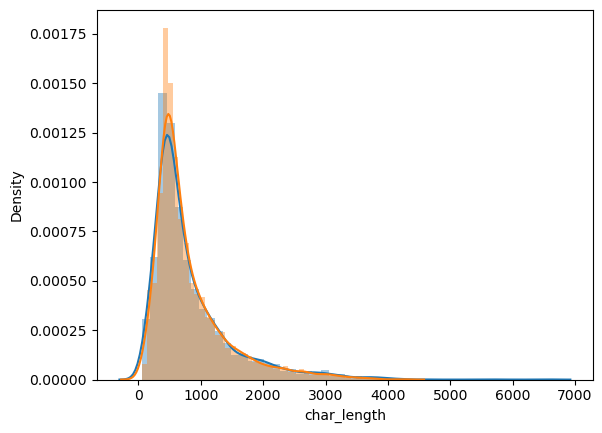

In [47]:
import seaborn as sns
sns.distplot(df[df['sentiment'] == 'positive']['char_length'])
sns.distplot(df[df['sentiment'] == 'negative']['char_length'])

<Axes: xlabel='word_length', ylabel='Density'>

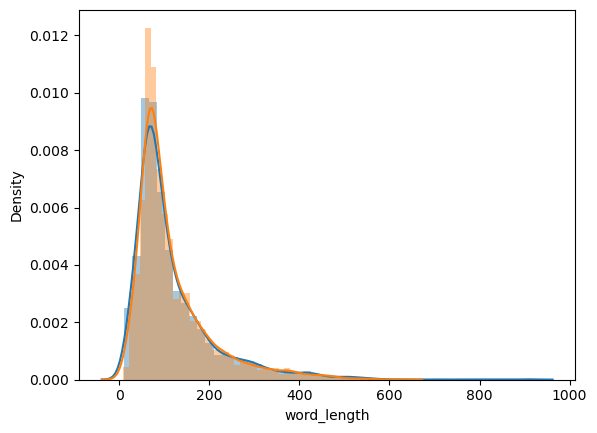

In [48]:
sns.distplot(df[df['sentiment'] == 'positive']['word_length'])
sns.distplot(df[df['sentiment'] == 'negative']['word_length'])

In [49]:
# common unigrams, bigrams, trigrams
from nltk import ngrams

In [51]:
pd.Series(ngrams(df['tokenized_review'].sum(),2)).value_counts()

(I, would)                492
(ever, seen)              459
(special, effects)        438
(I, seen)                 429
(even, though)            372
                         ... 
(liven, party)              1
(party, upwith)             1
(upwith, absolutely)        1
(connection, original)      1
(hurt, yet)                 1
Length: 845130, dtype: int64

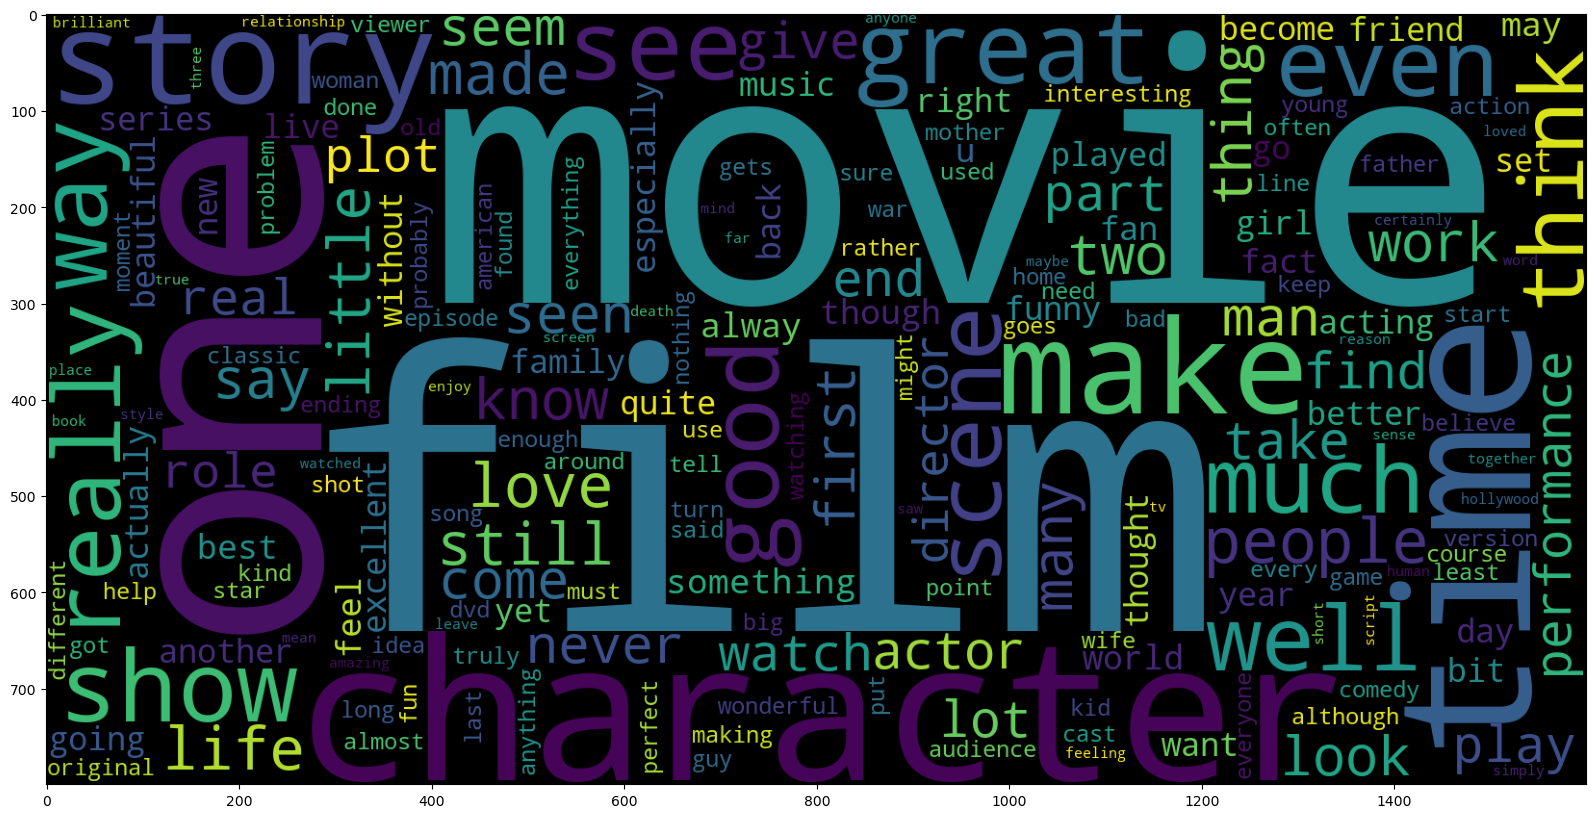

In [56]:
# Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
wc = WordCloud(width = 1600, height = 800).generate(' '.join(df[df['sentiment'] == 'positive']['review']))
plt.imshow(wc)

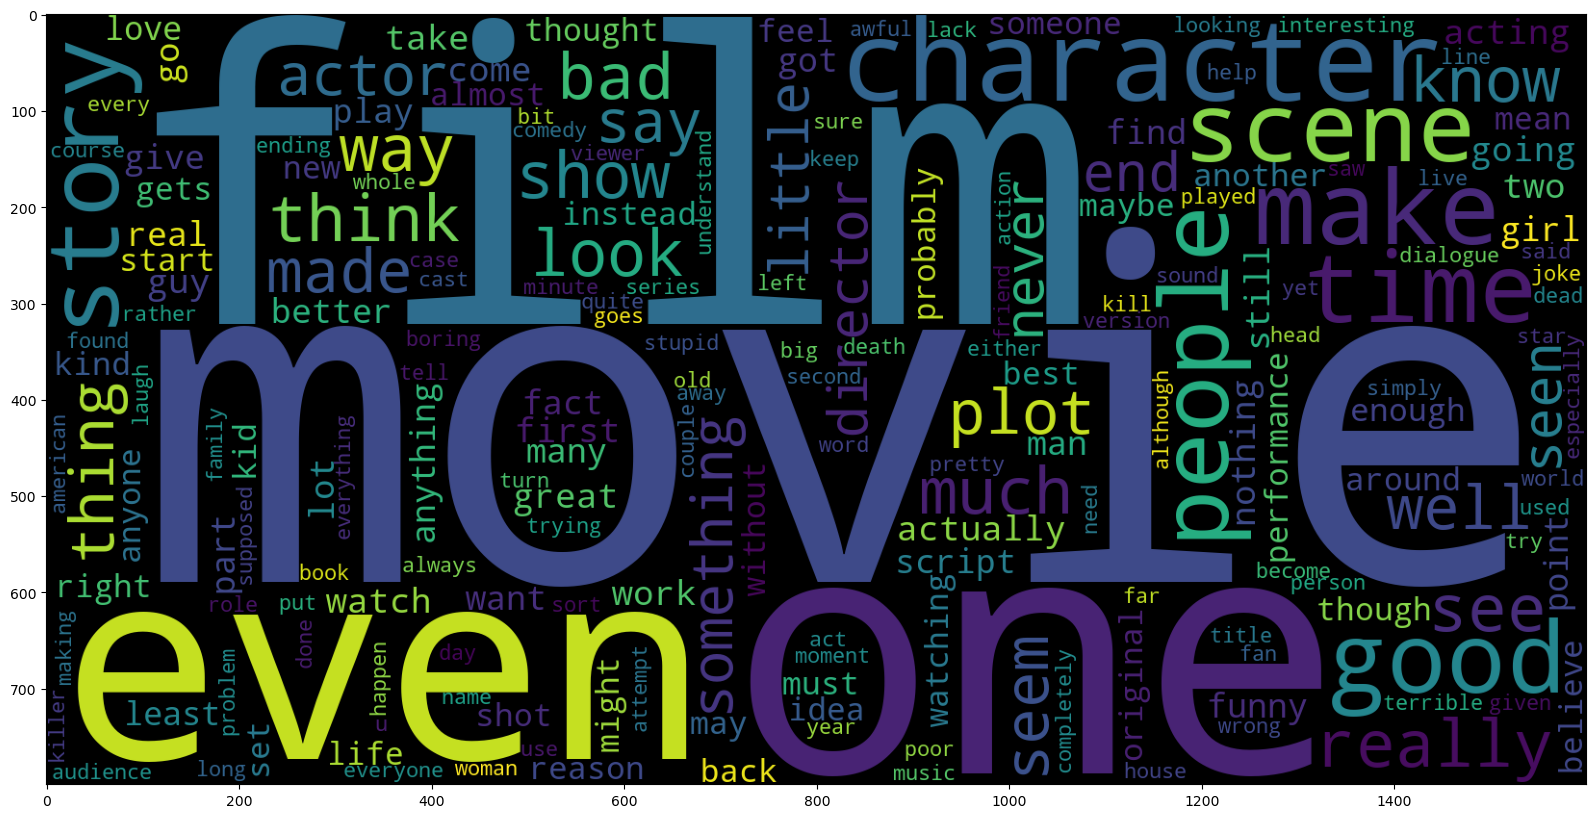

In [57]:
plt.figure(figsize = (20,10))
wc = WordCloud(width = 1600, height = 800).generate(' '.join(df[df['sentiment'] == 'negative']['review']))
plt.imshow(wc)

# Vectorization

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,3))
bag_of_words = count_vectorizer.fit_transform(df['review'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(), columns = count_vectorizer.get_feature_names_out())

In [66]:
bag_of_words

10  10 10  10 minutes  10 years  100  1010  11  110  12  13  ...  \
0      0      0           0         0    0     0   0    0   0   0  ...   
1      0      0           0         0    0     0   0    0   0   0  ...   
2      0      0           0         0    0     0   0    0   0   0  ...   
3      1      0           0         0    0     0   0    0   0   0  ...   
4      0      0           0         0    0     0   0    0   0   0  ...   
...   ..    ...         ...       ...  ...   ...  ..  ...  ..  ..  ...   
9995   0      0           0         0    0     0   0    0   0   0  ...   
9996   0      0           0         0    0     0   0    0   0   0  ...   
9997   0      0           0         0    0     0   0    0   0   0  ...   
9998   0      0           0         0    0     0   0    0   0   0  ...   
9999   0      0           0         0    0     0   0    0   0   0  ...   

      young girl  young man  young people  young woman  younger  youth  zero  \
0              0          0             0            0        0      0     0   
1              0          0             0            0        0      0     0   
2              0          0             0            0        0      0     0   
3              0          0             0            0        0      0     0   
4              0          0             0            0        0      0     0   
...          ...        ...           ...          ...      ...    ...   ...   
9995           0          0             0            0        0      0     0   
9996           0          0             0            0        0      0     0   
9997           0          0             0            0        0      0     0   
9998           0          0             0            0        0      0     0   
9999           0          0             0            0        0      0     0   

      zombie  zombies  zone  
0          0        0     0  
1          0        0     0  
2          0        0     0  
3          1        0     0  
4          0        0     0  
...      ...      ...   ...  
9995       0        0     0  
9996       0        0     0  
9997       0        0     0  
9998       0        0     0  
9999       0        0     0  

[10000 rows x 5000 columns]

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(bag_of_words.values)

In [71]:
pca_results.shape

(10000, 2)

<Axes: >

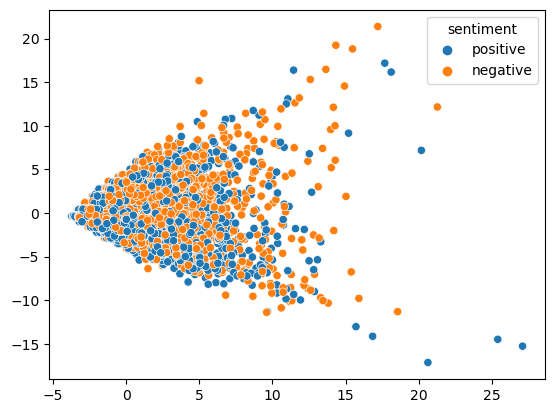

In [75]:
sns.scatterplot(x = pca_results[:,0], y = pca_results[:,1], hue = df['sentiment'])

In [77]:
from nltk import pos_tag_sents
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rudra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [78]:
pos_tag_sents(df['review'].apply(lambda x:x.split()))

[[('one', 'CD'),
  ('reviewers', 'NNS'),
  ('mentioned', 'VBD'),
  ('watching', 'VBG'),
  ('1', 'CD'),
  ('oz', 'JJ'),
  ('episode', 'NN'),
  ('hooked', 'VBD'),
  ('right', 'RB'),
  ('exactly', 'RB'),
  ('happened', 'VBD'),
  ('methe', 'NNS'),
  ('first', 'JJ'),
  ('thing', 'NN'),
  ('struck', 'VBD'),
  ('oz', 'JJ'),
  ('brutality', 'NN'),
  ('unflinching', 'VBG'),
  ('scenes', 'NNS'),
  ('violence', 'NN'),
  ('set', 'VBN'),
  ('right', 'RB'),
  ('word', 'NN'),
  ('go', 'VB'),
  ('trust', 'NN'),
  ('show', 'NN'),
  ('faint', 'NN'),
  ('hearted', 'VBD'),
  ('timid', 'JJ'),
  ('show', 'NN'),
  ('pulls', 'VBZ'),
  ('punches', 'NNS'),
  ('regards', 'NNS'),
  ('drugs', 'NNS'),
  ('sex', 'NN'),
  ('violence', 'NN'),
  ('hardcore', 'NN'),
  ('classic', 'JJ'),
  ('use', 'NN'),
  ('wordit', 'NN'),
  ('called', 'VBN'),
  ('oz', 'NN'),
  ('nickname', 'NN'),
  ('given', 'VBN'),
  ('oswald', 'JJ'),
  ('maximum', 'JJ'),
  ('security', 'NN'),
  ('state', 'NN'),
  ('penitentary', 'JJ'),
  ('focuses', 